## Principal Component Analysis (PCA)

_Análisis de componente Principal_



Cuando utilizamos algoritmos de selección de características (**Feature Selection**) mantenemos las características originales y seleccionamos las que mejoran el rendimiento de los clasificadores.
Mientras que en el contexto de **reducción de dimensionalidad** se puede entender como la comprensión de los datos con el objetivo de mantener la mayor de la información.

**Principales razones para aplicar reducción de dimensionalidad:**

1. Almacenamiento.
2. Eficiencia computacional.
3. Mejorar el rendimiento predictivo, reduciendo la alta dimensionalidad.

### PCA

**PCA** se enfoca en encontrar o identificar patrones en los datos, basándose en la correlación entre los atributos del dataset. 

De esta forma encuentra las direcciones de varianza máxima en datos de alta dimensionalidad y los proyecta en un nuevo subespacio con dimensiones iguales o menores que el original.

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html_

### PCA para Matrices Sparse

_**Documentación:** https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.SparsePCA.html_

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

# Escalado
from sklearn.preprocessing import MinMaxScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Clasificadores
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Validacion
from sklearn.model_selection import StratifiedKFold

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1


In [33]:
X, y = datasets.load_wine(return_X_y = True, as_frame = True)

columnas = X.columns

In [34]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

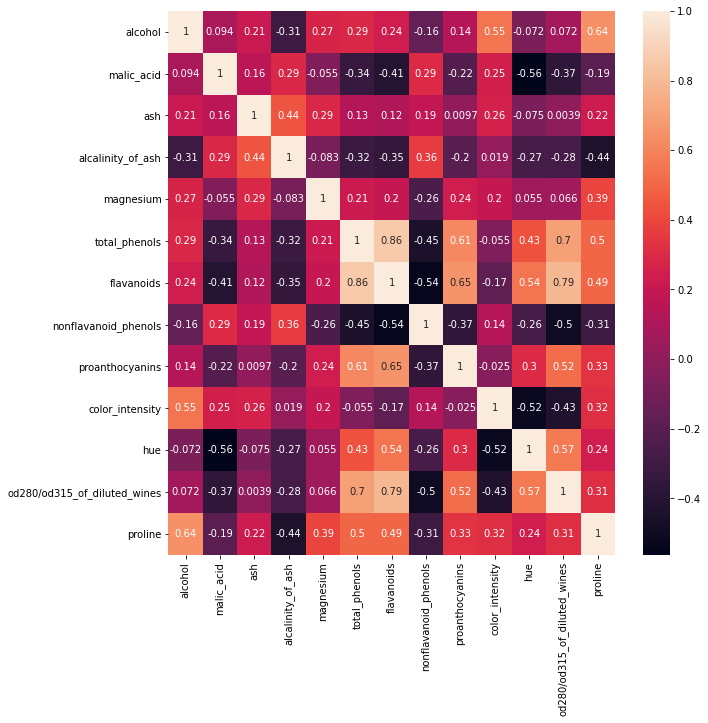

In [9]:
plt.figure(figsize = (10, 10))
sns.heatmap(X.corr(), annot = True)
plt.show()

### Modelo antes de PCA

### Train, Test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (124, 13), y_train: (124,)
X_test: (54, 13),  y_test: (54,)


### Preprocesamiento

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Escalado

x_scaler = StandardScaler()

X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

pd.DataFrame(X_train, columns = columnas)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.982686,-0.527640,0.173598,-1.087543,-0.727661,0.491455,0.791460,-0.596717,0.354587,0.255419,0.857462,0.437825,1.863180
1,0.957937,-0.745511,1.255504,0.839386,0.063252,1.131923,1.306553,-0.596717,1.343233,0.297587,1.032095,0.159563,1.749108
2,0.401078,-0.612894,1.777803,-1.235769,0.656436,0.491455,0.707363,-0.170491,-0.425924,-0.166255,0.595512,0.262081,0.429136
3,0.772317,-0.593949,-0.012937,-0.168547,0.392799,0.907759,1.243480,-1.193434,0.597412,0.803596,0.595512,0.408534,2.498722
4,-1.863482,0.107025,0.210905,0.098259,-0.266295,0.971806,0.822996,-0.340981,0.389276,-0.735516,-0.670576,1.155447,-0.401958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.772317,0.277533,1.218197,1.432287,0.326889,-1.189771,-1.226864,0.255736,-0.113719,1.545743,-0.932526,-1.173163,0.005441
120,-1.083879,-0.849710,0.509362,0.839386,-1.057208,0.427409,0.297391,0.596717,-0.980953,-0.883102,-0.103019,0.862540,-1.184164
121,0.190709,-0.366606,1.442039,1.728737,1.051893,-0.149012,-0.764332,-0.852453,-0.079030,0.887931,-1.500083,-1.861495,-1.053796
122,-0.873510,2.304674,0.658590,0.394710,-0.727661,-1.461970,-1.615812,1.449170,-1.397225,-0.482511,-0.888867,-1.949367,-0.092335


### Modelo

In [13]:
model = AdaBoostClassifier()
model = model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy_score(y_test, yhat)

/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8703703703703703

### Modelo con PCA

In [15]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [21]:
X_train.shape

(124, 1)

In [22]:
pd.DataFrame(X_train)

,0
0,2.184531
1,2.562591
2,1.399967
3,2.760675
4,0.746032
...,...
119,-2.213501
120,-0.461959
121,-1.859195
122,-4.020149


### Modelo

In [23]:
model = AdaBoostClassifier()
model = model.fit(X_train, y_train)

yhat = model.predict(X_test)

accuracy_score(y_test, yhat)

/Users/federicollanes/miniforge3/envs/fede/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.7777777777777778

In [ ]:
pca.explained_variance_

### Varianza del Modelo de PCA

In [25]:
# Datos
X, y = datasets.load_wine(return_X_y = True, as_frame = True)

# Escalado
x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

# PCA
pca = PCA()
X = pca.fit_transform(X)

In [26]:
X.shape

(178, 13)

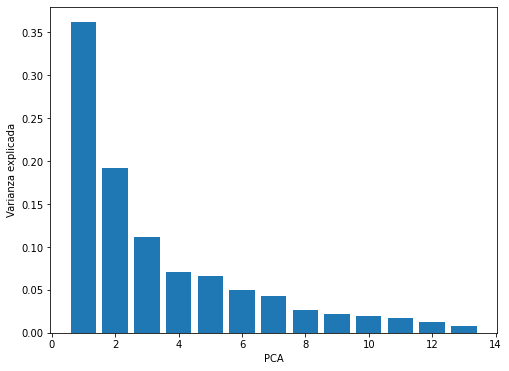

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [27]:
# Grafico de las variancias
plt.figure(figsize = (8, 6))

plt.bar(range(1, X.shape[1] + 1), pca.explained_variance_ratio_)

plt.ylabel("Varianza explicada")
plt.xlabel("PCA")
plt.show()


print(pca.explained_variance_)

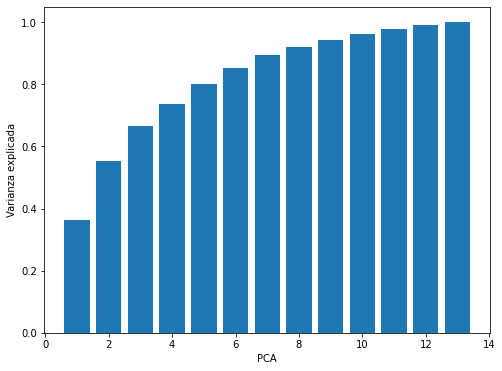

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [30]:
# Grafico de las variancias
plt.figure(figsize = (8, 6))

plt.bar(range(1, X.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_))

plt.ylabel("Varianza explicada")
plt.xlabel("PCA")
plt.show()


print(pca.explained_variance_)

In [31]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [ ]:
def pca_n(n):
    
    print(f"n = {n}")
    
    # Datos
    X, y = datasets.load_wine(return_X_y = True, as_frame = True)
    
    # Train, Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

    # Escalado
    x_scaler = StandardScaler()
    X_train = x_scaler.fit_transform(X_train)
    X_test = x_scaler.transform(X_test)

    # PCA
    pca = PCA(n_components = n)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    # Grafico de las variancias
    plt.figure(figsize = (8, 6))

    plt.bar(range(1, X_train.shape[1] + 1), pca.explained_variance_ratio_)

    plt.ylabel("Varianza explicada")
    plt.xlabel("PCA")
    plt.show()
    
    # Modelo
    model = AdaBoostClassifier()
    model = model.fit(X_train, y_train)

    yhat = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, yhat)}")
    print("*"*100)

In [ ]:
for n in range(1, 14):
    pca_n(n)

# Con el dataset del vino

In [35]:
X, y = datasets.load_wine(return_X_y = True, as_frame = True)

columnas = X.columns

In [37]:
# 1) Probar métodos de clustering. Kmeans y DBScan, probar ambos, elegir los mejores parámetros.

In [ ]:
################################################################################################################################